In [127]:
#All necessary Imports
from pandas import read_csv
from datetime import datetime
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [128]:
%matplotlib notebook

dataset = read_csv('ks-projects-201801.csv')
print(dataset.keys()) # important keys for the data
column = ['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real']
df1 = (pd.DataFrame(dataset, columns= column))
encoder = preprocessing.LabelEncoder()
encoder.fit(df1.state)
target_encoded = encoder.transform(df1.state)

#Encoding target values to numericals:
for i,item in enumerate(encoder.classes_):
    print(item, '=', i)
print('\n')
#adding target as numericals and dropping state column.
df1['target']= target_encoded
df1.drop(['state'],1, inplace=True)


#Encoding Main_category to numericals:
encoder1 = preprocessing.LabelEncoder()
encoder1.fit(df1.main_category)
main_category_encoded = encoder1.transform(df1.main_category)
for i,item in enumerate(encoder1.classes_):
    print(item, '=', i)
print('\n')
df1['main_category'] = main_category_encoded

#Encoding Country to numericals:
encoder2 = preprocessing.LabelEncoder()
encoder2.fit(df1.country)
country_encoded = encoder2.transform(df1.country)
for i,item in enumerate(encoder2.classes_):
    print(item, '=', i)
print('\n')
df1['country'] = country_encoded

#calculating the difference of dates from the date of launch to the deadline date.
a = dataset['launched']
b = dataset['deadline']
new=pd.DataFrame(columns=['time'])
new
new['time'] = (pd.to_datetime(b) - pd.to_datetime(a)).map(lambda x:x.days)
new['time']
#adding the date difference in Feature list
df1['time'] = new['time']




Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')
canceled = 0
failed = 1
live = 2
successful = 3
suspended = 4
undefined = 5


Art = 0
Comics = 1
Crafts = 2
Dance = 3
Design = 4
Fashion = 5
Film & Video = 6
Food = 7
Games = 8
Journalism = 9
Music = 10
Photography = 11
Publishing = 12
Technology = 13
Theater = 14


AT = 0
AU = 1
BE = 2
CA = 3
CH = 4
DE = 5
DK = 6
ES = 7
FR = 8
GB = 9
HK = 10
IE = 11
IT = 12
JP = 13
LU = 14
MX = 15
N,0" = 16
NL = 17
NO = 18
NZ = 19
SE = 20
SG = 21
US = 22




In [126]:
#selected features and target:
df2 = df1
#df2 after various non related features dropped:
df2.drop(['ID'],axis=1,inplace = True)
df2.drop(['name'],axis=1,inplace = True)
df2.drop(['category'],axis=1,inplace = True)
df2.drop(['currency'],axis=1,inplace = True)
df2.drop(['goal'],axis=1,inplace = True)
df2.drop(['pledged'],axis=1,inplace = True)
df2.drop(['deadline'],axis=1,inplace = True)
df2.drop(['launched'],axis=1,inplace = True)
df2.drop(['usd pledged'],axis=1,inplace = True)

#Do this for non numeric features and transformed features.

#scaler=preprocessing.MinMaxScaler().fit(df2)
#df2_transformed = scaler.transform(df2)


ValueError: labels ['ID'] not contained in axis

In [129]:
df2

,main_category,backers,country,usd_pledged_real,usd_goal_real,target,time
0,12,0,9,0.00,1533.95,1,58
1,6,15,22,2421.00,30000.00,1,59
2,6,3,22,220.00,45000.00,1,44
3,10,1,22,1.00,5000.00,1,29
4,6,14,22,1283.00,19500.00,0,55
5,7,224,22,52375.00,50000.00,3,34
6,7,16,22,1205.00,1000.00,3,19
7,7,40,22,453.00,25000.00,1,44
8,4,58,22,8233.00,125000.00,0,34
9,6,43,22,6240.57,65000.00,0,29


<IPython.core.display.Javascript object>


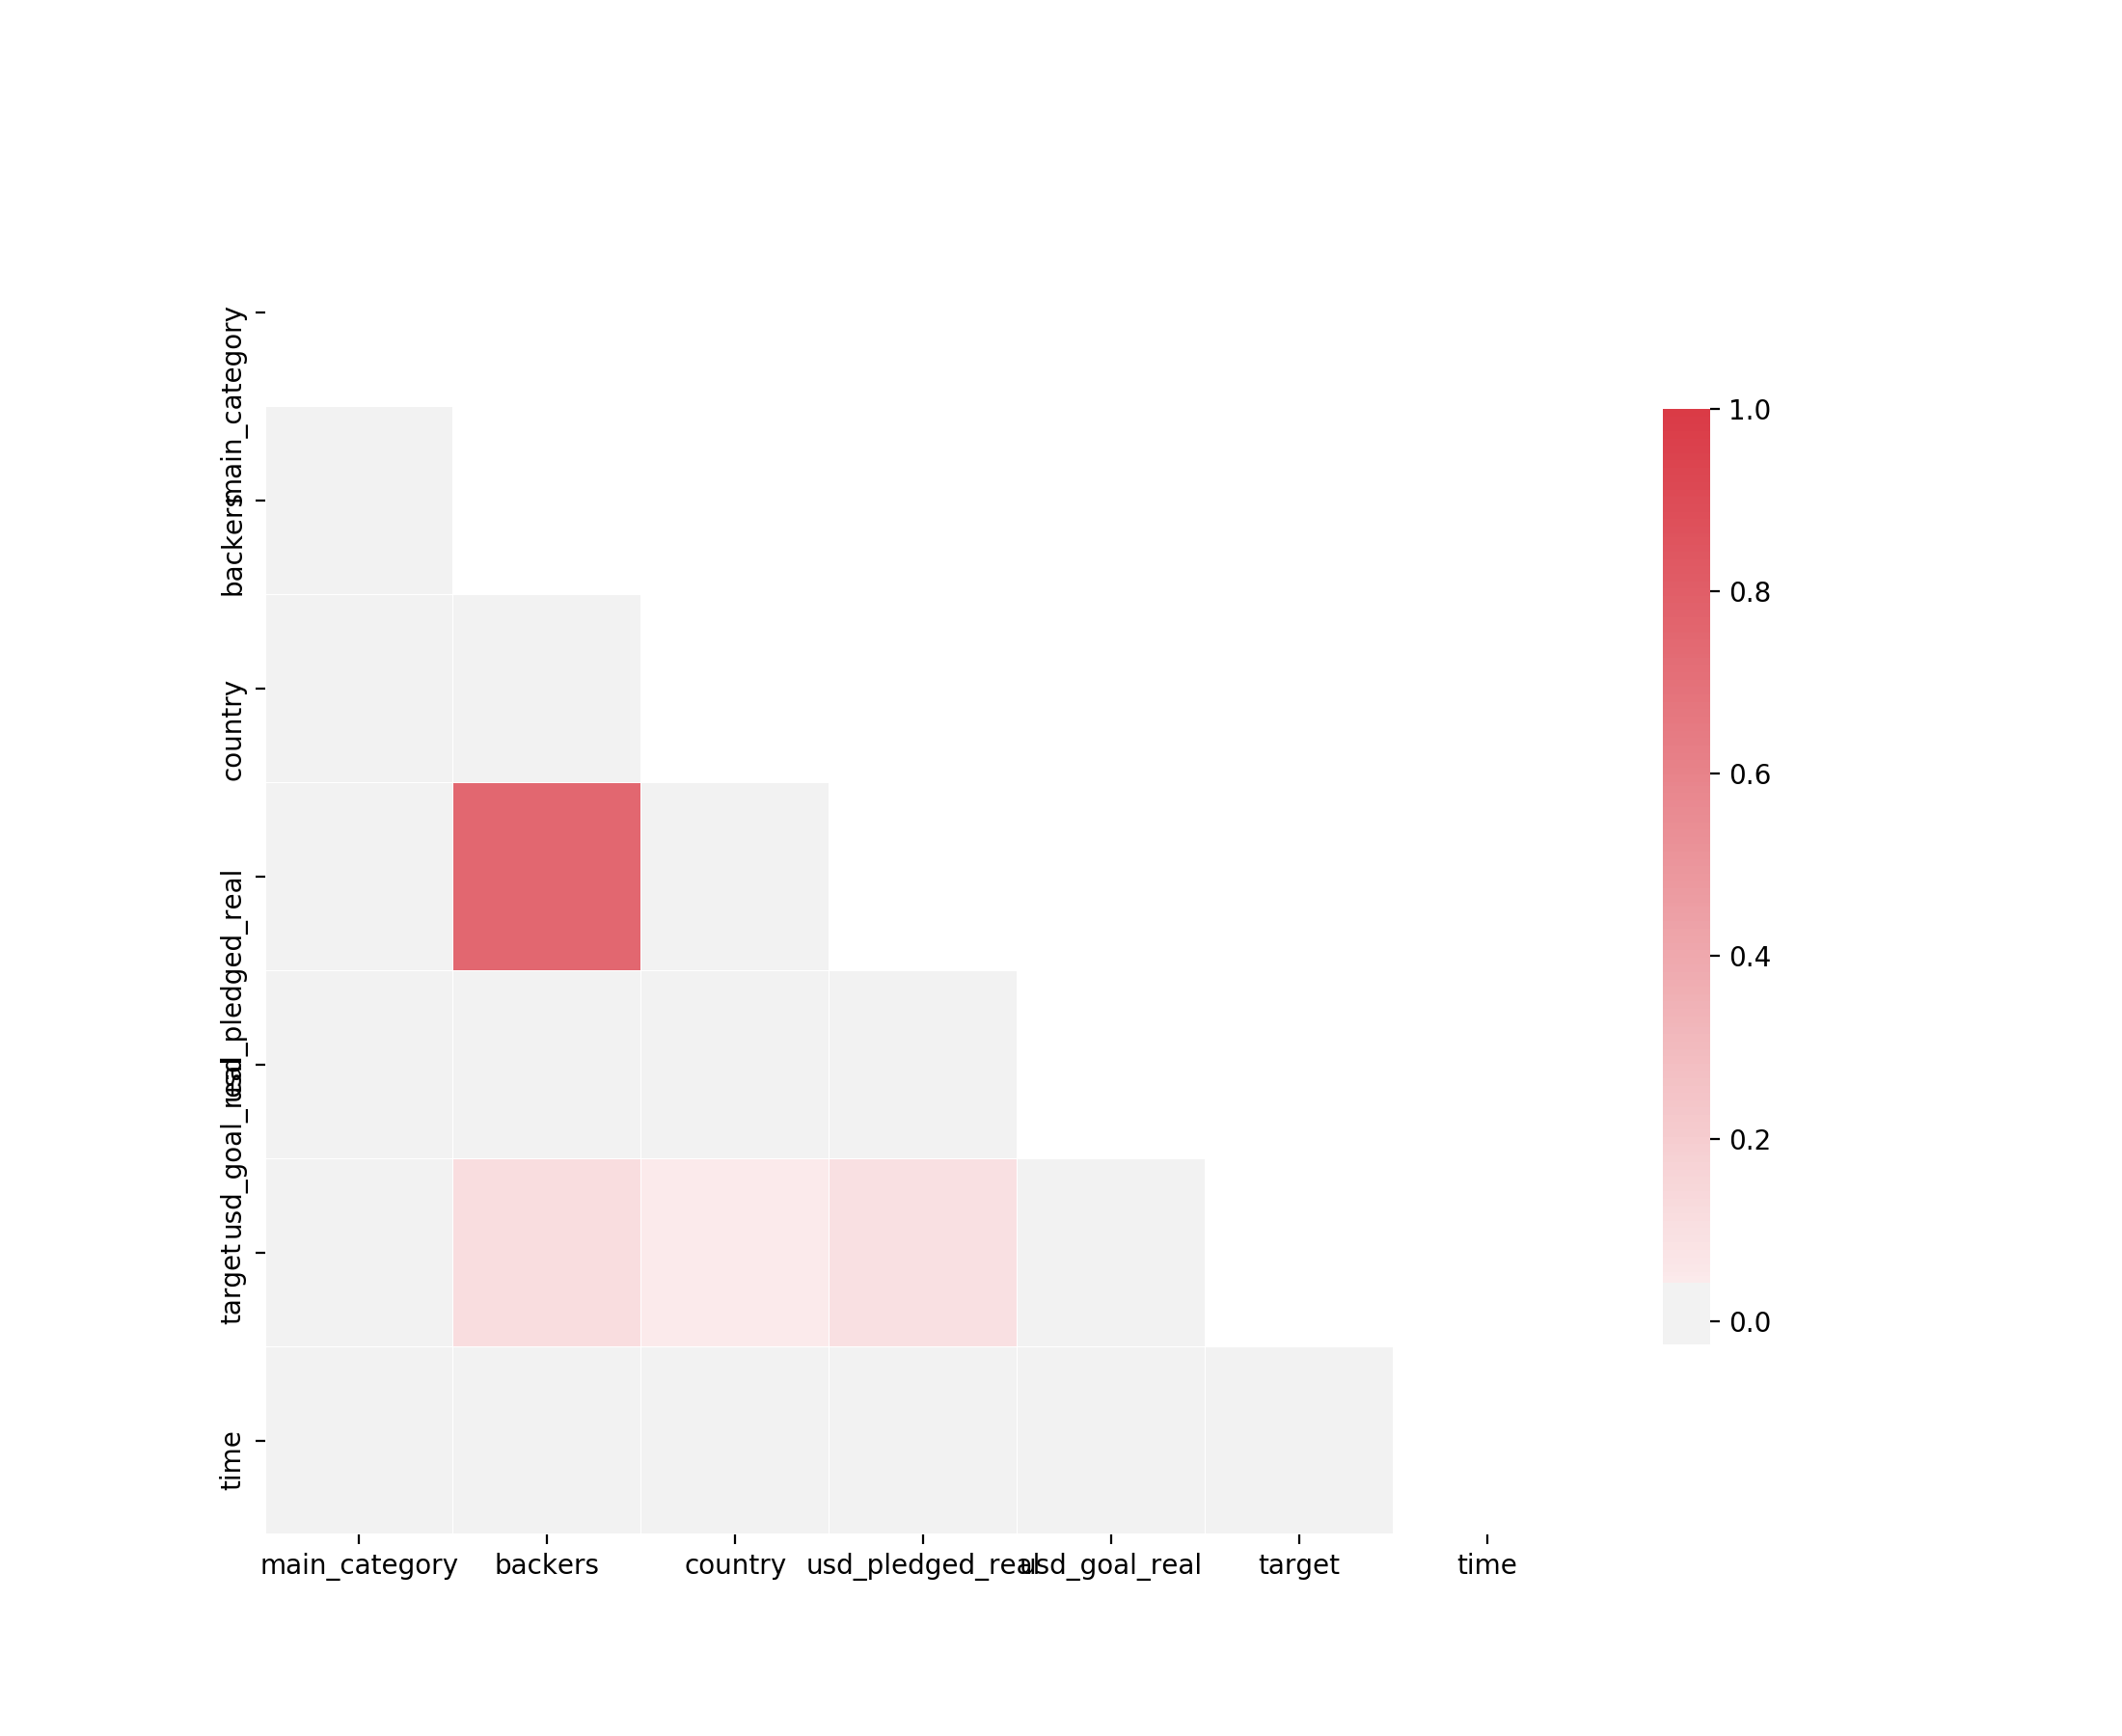

In [130]:
#correlation matrix with all features against target
corr = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .7})

# Features mostly correlated to target(state) = usd_pledged_real, backers, usd_goal_real, time, category.

In [131]:
X = df2[['main_category','backers','country','usd_pledged_real','usd_goal_real','time']].values
Y = df2.target

#Splitting data into train and test to implement machine learning algorithms
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
print('shape of X_train is:', X_train.shape)
print('shape of X_test is:', X_test.shape)

#Scaling The Features:
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) #apply scaling on training set
X_test_transformed=scaler.transform(X_test)

#Using LDA classifier
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train_transformed, Y_train)
print("The Accuracy using LDA: ",LDAmodelFitted.score(X_test_transformed,Y_test))

#Using QDA classifier:
QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train_transformed, Y_train)
print("The Accuracy using QDA: ",QDAmodelFitted.score(X_test_transformed,Y_test))



shape of X_train is: (283995, 6)
shape of X_test is: (94666, 6)


/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The Accuracy using LDA:  0.532419242389
The Accuracy using QDA:  0.617423362136


/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [132]:
#Using Normal Decision Tree:
treeModel=DecisionTreeClassifier( criterion='gini',max_depth=10)
treeModel.fit(X_train_transformed,Y_train)
print("The Accuracy using Decision Tree with a depth of 10:",treeModel.score(X_test_transformed,Y_test))
treeImpFeatures = treeModel.feature_importances_
print(treeImpFeatures)

The Accuracy using Decision Tree with a depth of 10: 0.873428686118
[ 0.0038543   0.4902515   0.01452725  0.24859112  0.23913304  0.00364279]


In [134]:
#Using Random Forest:
forestModel= RandomForestClassifier (n_estimators=15, max_features=6,
max_depth=15, random_state=0) 
forestModel.fit(X_train_transformed,Y_train)
print("The Accuracy using Random Forest with a depth of 10:",forestModel.score(X_test_transformed,Y_test))
RandImpFeatures = forestModel.feature_importances_
print(RandImpFeatures)

The Accuracy using Random Forest with a depth of 10: 0.880992119663
[ 0.0121971   0.44590043  0.01648472  0.2423543   0.26849397  0.01456948]


In [117]:
#Using Adaptive Boost:
BoostModel= AdaBoostClassifier(n_estimators=5)
BoostModel.fit(X_train_transformed,Y_train)
print("The Accuracy using Adaptive Boost with a depth of 5:",BoostModel.score(X_test_transformed,Y_test))


The Accuracy using Adaptive Boost with a depth of 5: 0.711448672174


In [135]:
X_selected = df2[['backers','usd_pledged_real','usd_goal_real']].values
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_selected,Y,random_state=0)

#Scaling The Features:
scaler1=preprocessing.MinMaxScaler().fit(X_train1)
X_train_transformed1=scaler1.transform(X_train1) #apply scaling on training set
X_test_transformed1=scaler1.transform(X_test1)

#LDA after only using three features:
LDAmodelFitted1 = LinearDiscriminantAnalysis().fit(X_train_transformed1, Y_train1)
print("The Accuracy using LDA: ",LDAmodelFitted1.score(X_test_transformed1,Y_test1))

#QDA after only using three features:
QDAmodelFitted1 = QuadraticDiscriminantAnalysis().fit(X_train_transformed1, Y_train1)
print("The Accuracy using QDA: ",QDAmodelFitted1.score(X_test_transformed1,Y_test1))


The Accuracy using LDA:  0.53126782583
The Accuracy using QDA:  0.0099613377559


/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
